In [1]:
import os
# Directory with our training horse pictures
train_daninhas_dir = os.path.join('../../sensix_daninhas/dataset_100x100/train/daninha')
 
# Directory with our training human pictures
train_sem_daninhas_dir = os.path.join('../../sensix_daninhas/dataset_100x100/train/sem_daninha')

train_daninhas_names = os.listdir(train_daninhas_dir)
print('Total Daninhas     = ', len(train_daninhas_names))
train_sem_daninhas_names = os.listdir(train_sem_daninhas_dir)
print('Total Sem_Daninhas = ', len(train_sem_daninhas_names))

Total Daninhas     =  98
Total Sem_Daninhas =  101


In [17]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(100, 100, 3), 
                           #strides=1, padding='valid', dilation_rate=1, use_bias=True,
                           #kernel_initializer='variance_scaling', bias_initializer='zeros',
                           #bias_regularizer='L1L2', bias_constraint='min_max_norm'
                        ),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    #tf.keras.layers.LeakyReLU(alpha=0.1),
    #tf.keras.layers.Activation(activations.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='elu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Tzhe fifth convolutionCamada conectada localmente com peso não compartilhado: esse tipo de camada é como uma camada convolucional, mas sem compartilhamento de peso. Ou seja, um conjunto diferente de filtros é aplicado e
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='elu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 98, 98, 8)         224       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 49, 49, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 47, 47, 16)        1168      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 21, 21, 64)        9280      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 64)         

In [30]:
'''model = tf.keras.models.Sequential([
    #tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.LocallyConnected2D(16, (3,3)),
    tf.keras.layers.Dense(12, input_dim=8, activation='relu'),
    #tf.keras.layers.Activation(activations.relu)
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
'''
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(100, 100 ,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1)
])# Compile the model
model.compile(optimizer='adam',              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),              metrics=['accuracy'])

In [4]:
import random

random.seed(30)
print("first Number", random.randint(25, 50))

# generates a different random number
print("Second Number ", random.randint(25, 50))

# will generate a same random number as first one because seed value is same
random.seed(50)
print("Third Number", random.randint(25, 50))

first Number 42
Second Number  50
Third Number 40


In [11]:
#scores = model.evaluate(train_generator, validation_generator)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

from ann_visualizer.visualize import ann_viz;

ann_viz(model, view=True, filename="Anne", title="Anne is the Future")

./drone.jpg


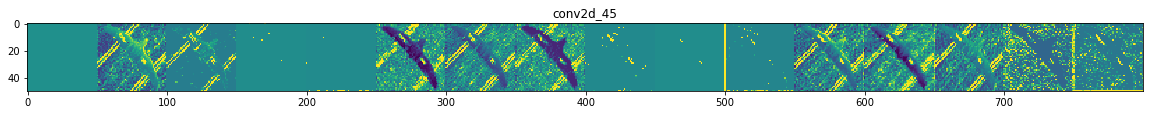

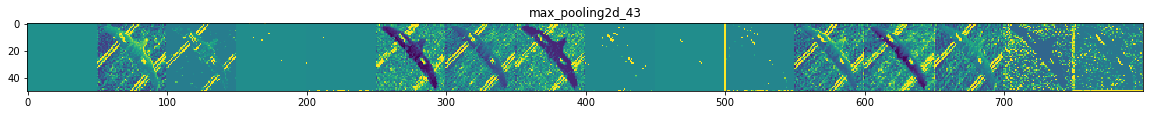

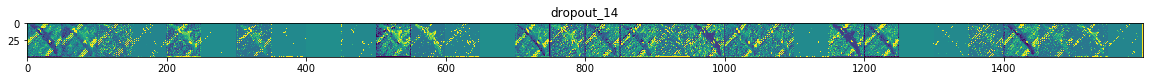

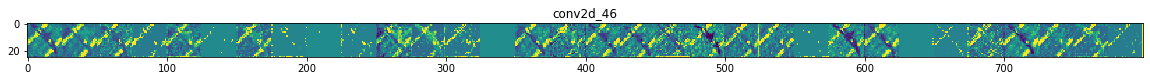

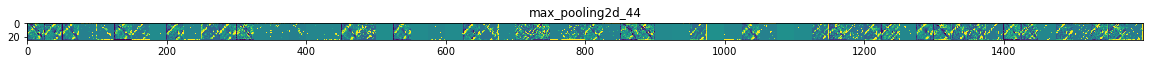

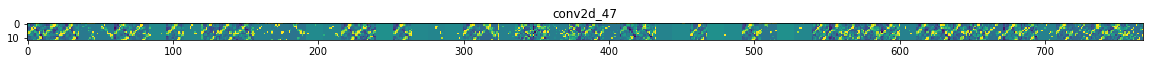

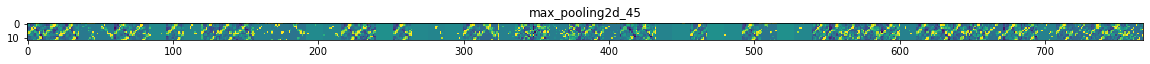

In [31]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
 
# Index for iterating over images
pic_index = 0
    
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
daninha_img_files = [os.path.join(train_daninhas_dir, f) for f in train_daninhas_names]
sem_daninha_img_files = [os.path.join(train_sem_daninhas_dir, f) for f in train_sem_daninhas_names]
img_path = './drone.jpg'
print(img_path)
img = load_img(img_path, target_size=(100, 100))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
 
# Rescale by 1/255
x /= 255
 
# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
 
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
 
# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
          # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            if x.std()>0:
                x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

16


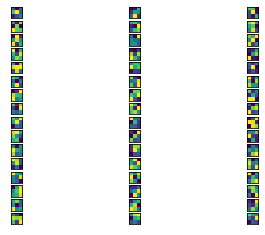

32


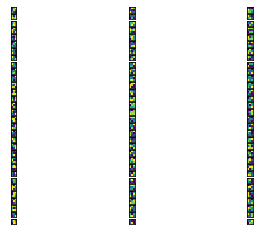

64


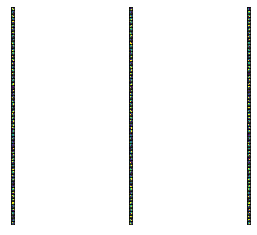

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
import os
import numpy as np
import matplotlib.pyplot as plt

#Iterate thru all the layers of the model
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        #print(layer.name, filters.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

(1, 50, 50, 16)
(1, 50, 50, 16)
(1, 50, 50, 32)
(1, 25, 25, 32)
(1, 25, 25, 64)
(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 512)
(1, 1)


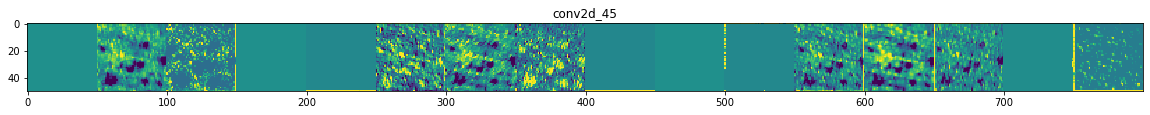

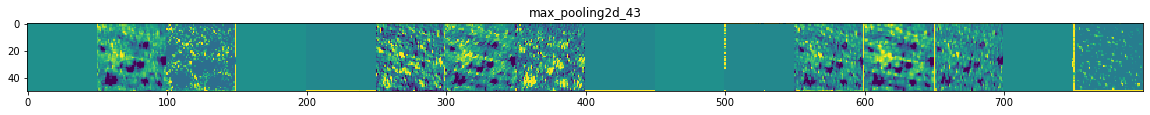

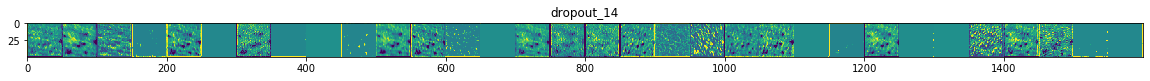

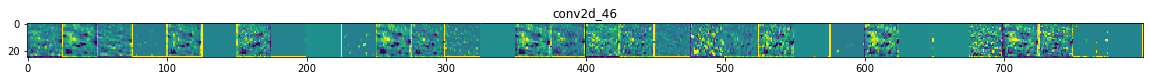

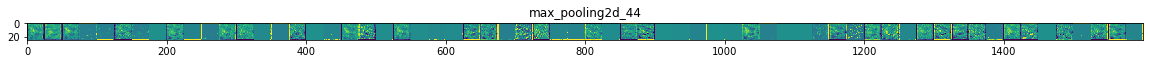

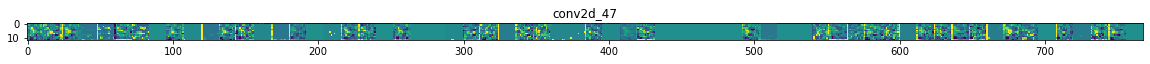

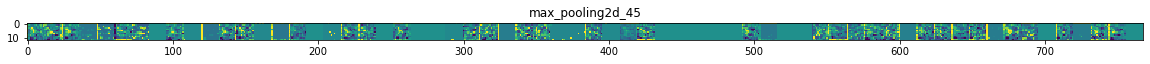

In [47]:
img_path='../../sensix_daninhas/dataset_100x100/validation/daninha/daninha_8.jpg' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)#Load the input image
img = load_img(img_path, target_size=(100, 100))# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)# Rescale by 1/255
x /= 255.0# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
        x  = feature_map[0, :, :, i]
        x -= x.mean()
        if x.std()>0:
                x /= x.std()
        x *=  64
        x += 128
        x  = np.clip(x, 0, 255).astype('uint8')
        # Tile each filter into a horizontal grid
        display_grid[:, i * size : (i + 1) * size] = x# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )